In [4]:
# IMPORTS"
%matplotlib inline 
from pprint import pprint
from collections import Counter
from collections import defaultdict
import random
import time
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import islice
import queue as q

In [5]:
scenario_2 = 'capture20110811.pcap.netflow.labeled'

def parse_line(split_line):
    src = split_l[3].split(':')
    dst = split_l[5].split(':')

    return {
        'datetime': split_l[0],
        'duration': split_l[1],
        'protocol': split_l[2],
        'src_ip': src[0],
        'src_port': '' if len(src) == 1 else src[1],
        'dst_ip': dst[0],
        'dst_port': '' if len(dst) == 1 else src[1],
        'flags': split_l[6],
        'tos': split_l[7],
        'packets': int(split_l[8]),
        'bytes': int(split_l[9]),
        'flows': split_l[10],
        'label': split_l[11][:-1]
    }

parsed = []
with open('Data/{}'.format(scenario_2)) as f:                                
    next(f) # Skip header
    for idx, l in enumerate(f):
        try:
            split_l = list(filter(None, l.split('\t')))
            parsed.append(parse_line(l))
        except Exception as e:
#             print('ERROR on line {}, raw string {}, splitted as {}'.format(idx, l, split_l))
            try:
#                 print('Attempting to pars with space as dividing character...')
                split_l = list(filter(None, l.split(' ')))
                split_l[0:2] = [' '.join(split_l[0:2])] # Merge date and time again
                parsed.append(parse_line(l))
            except Exception as e:
                print('Final ERROR, skipping line, splitted as {}, error {}'.format(split_l, e))

In [6]:
scenario_data = pd.DataFrame.from_records(parsed)
scenario_data['datetime'] = pd.to_datetime(scenario_data['datetime'])
scenario_data.set_index(['datetime'], inplace=True)
scenario_data

,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-11 10:10:00.003,135,147.32.84.229,23929,0.967,INT,1,Background,2,UDP,89.31.8.11,23929,0
2011-08-11 10:10:00.003,276,89.31.8.11,13363,0.967,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.006,62,147.32.84.229,34042,0.000,INT,1,Background,1,UDP,208.88.186.6,34042,0
2011-08-11 10:10:00.008,78,147.32.84.229,55246,0.000,INT,1,Background,1,UDP,92.118.218.77,55246,0
2011-08-11 10:10:00.009,72,147.32.84.229,10223,0.000,INT,1,Background,1,UDP,182.185.139.181,10223,0
2011-08-11 10:10:00.011,60,92.118.218.77,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,182.185.139.181,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.013,77,147.32.84.229,6386,0.000,INT,1,Background,1,UDP,86.27.118.198,6386,0
2011-08-11 10:10:00.014,60,86.27.118.198,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0


In [10]:
host = '147.32.84.229'
scenario_data = scenario_data[scenario_data['src_ip'] == host]
scenario_data

,bytes,dst_ip,dst_port,duration,flags,flows,label,packets,protocol,src_ip,src_port,tos
datetime,,,,,,,,,,,,
2011-08-11 10:10:00.003,276,89.31.8.11,13363,0.967,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,92.118.218.77,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.011,60,182.185.139.181,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.014,60,86.27.118.198,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.023,60,213.246.38.78,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.028,526,194.165.188.87,13363,0.215,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.029,60,86.186.242.169,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.038,358,87.20.151.25,13363,1.998,INT,1,Background,2,UDP,147.32.84.229,13363,0
2011-08-11 10:10:00.040,73,1.168.131.80,13363,0.000,INT,1,Background,1,UDP,147.32.84.229,13363,0


### Min-Wise sampling

In [66]:
class MaxWiseSampling:
    """
    Because Priority gives lowest score highes priority, use MaxWise instead of MinWise sampling
    Eventually queue will be filled with score values close to 1
    """
    def __init__(self, maximumSize):
        self.queue = q.PriorityQueue(maxsize=maximumSize)

    def add(self, element):
        score = random.uniform(0, 1)
        if self.queue.full():
            old_smallest_value = self.queue.get()
            if old_smallest_value[0] < score:
                # New element is larger so replace smallest element
                self.queue.put((score, element))
            else:
                # Put back old item
                self.queue.put(max_element)
        else:
            self.queue.put((score, element))

    def count(self):
        ip_dict = defaultdict(lambda: 0)
        while not self.queue.empty():
            ip_dict[self.queue.get()[1]] += 1
        return ip_dict

### Min-Wise evaluation 

In [89]:
def calculate_distribution_error(counts_list_1: list, counts_list_2: list):
    """
    Given two list of Counters, calculate the total error between them by order
    """
    
    print(counts_list_1)
    print(counts_list_2)
    
    c_1 = [x for x in counts_list_1[0]]
    c_2 = [x for x in counts_list_2[0]]
    
#     counts_dict_1 = {}
#     for c in counts_list_1:
#         counts_dict_1[c[0]] = c[1]
        
#     counts_dict_2 = {}
#      for c in counts_list_2:
#         counts_dict_2[c[0]] = c[1]
    
    distance = 0
    for idx, e in enumerate(c_1):
        try:
            distance += abs(idx - c_2.index(e))
        except ValueError:  # Order can not be found so assign max distance
            distance += 10
    return distance

In [68]:
actual_distribution = Counter(scenario_data['dst_ip']).most_common(10)
actual_distribution

[('78.141.179.10', 1934),
 ('149.5.45.70', 1736),
 ('144.177.50.6', 1308),
 ('78.141.181.221', 1257),
 ('208.88.186.8', 1240),
 ('89.202.144.42', 1228),
 ('78.141.179.8', 1216),
 ('196.27.98.8', 1204),
 ('208.88.186.9', 1171),
 ('195.26.144.7', 1162)]

In [77]:
min_wise_reservoir_sizes = range(500, 2000, 250)

# Create sample distributions using different reservoir sizes
min_wise_reservoirs = {}
for size in min_wise_reservoir_sizes:
    mws = MinWiseSampling(size)
    for dst_ip in scenario_data['dst_ip']:
        mws.add(dst_ip)
    counts = Counter(mws.count()).most_common(10)
    min_wise_reservoirs[size] = counts

min_wise_reservoirs

{500: [('78.141.181.223', 2), ('79.48.232.124', 2), ('194.165.188.87', 2), ('201.144.87.45', 2), ('78.141.181.222', 2), ('83.208.30.223', 1), ('212.25.57.128', 1), ('114.198.66.168', 1), ('194.103.240.26', 1), ('118.160.185.42', 1)]}
{500: [('78.141.181.223', 2), ('79.48.232.124', 2), ('194.165.188.87', 2), ('201.144.87.45', 2), ('78.141.181.222', 2), ('83.208.30.223', 1), ('212.25.57.128', 1), ('114.198.66.168', 1), ('194.103.240.26', 1), ('118.160.185.42', 1)], 750: [('149.5.45.4', 3), ('78.141.181.223', 3), ('99.6.149.144', 3), ('201.144.87.45', 2), ('194.165.188.87', 2), ('79.48.232.124', 2), ('149.5.45.254', 2), ('78.141.181.222', 2), ('94.164.1.100', 2), ('85.115.106.186', 1)]}
{500: [('78.141.181.223', 2), ('79.48.232.124', 2), ('194.165.188.87', 2), ('201.144.87.45', 2), ('78.141.181.222', 2), ('83.208.30.223', 1), ('212.25.57.128', 1), ('114.198.66.168', 1), ('194.103.240.26', 1), ('118.160.185.42', 1)], 750: [('149.5.45.4', 3), ('78.141.181.223', 3), ('99.6.149.144', 3), ('20

{500: [('78.141.181.223', 2),
  ('79.48.232.124', 2),
  ('194.165.188.87', 2),
  ('201.144.87.45', 2),
  ('78.141.181.222', 2),
  ('83.208.30.223', 1),
  ('212.25.57.128', 1),
  ('114.198.66.168', 1),
  ('194.103.240.26', 1),
  ('118.160.185.42', 1)],
 750: [('149.5.45.4', 3),
  ('78.141.181.223', 3),
  ('99.6.149.144', 3),
  ('201.144.87.45', 2),
  ('194.165.188.87', 2),
  ('79.48.232.124', 2),
  ('149.5.45.254', 2),
  ('78.141.181.222', 2),
  ('94.164.1.100', 2),
  ('85.115.106.186', 1)],
 1000: [('78.141.181.223', 4),
  ('149.5.45.4', 3),
  ('99.6.149.144', 3),
  ('78.141.181.222', 2),
  ('149.5.45.254', 2),
  ('201.144.87.45', 2),
  ('95.97.45.121', 2),
  ('194.165.188.87', 2),
  ('208.88.186.6', 2),
  ('85.193.5.150', 2)],
 1250: [('78.141.181.223', 4),
  ('99.6.149.144', 3),
  ('149.5.45.4', 3),
  ('87.1.96.81', 3),
  ('83.16.148.131', 2),
  ('79.140.196.22', 2),
  ('96.3.172.225', 2),
  ('85.193.5.150', 2),
  ('109.115.163.244', 2),
  ('94.164.1.100', 2)],
 1500: [('78.141.181.2

{500: [('78.141.181.223', 2), ('79.48.232.124', 2), ('194.165.188.87', 2), ('201.144.87.45', 2), ('78.141.181.222', 2), ('83.208.30.223', 1), ('212.25.57.128', 1), ('114.198.66.168', 1), ('194.103.240.26', 1), ('118.160.185.42', 1)], 750: [('149.5.45.4', 3), ('78.141.181.223', 3), ('99.6.149.144', 3), ('201.144.87.45', 2), ('194.165.188.87', 2), ('79.48.232.124', 2), ('149.5.45.254', 2), ('78.141.181.222', 2), ('94.164.1.100', 2), ('85.115.106.186', 1)], 1000: [('78.141.181.223', 4), ('149.5.45.4', 3), ('99.6.149.144', 3), ('78.141.181.222', 2), ('149.5.45.254', 2), ('201.144.87.45', 2), ('95.97.45.121', 2), ('194.165.188.87', 2), ('208.88.186.6', 2), ('85.193.5.150', 2)], 1250: [('78.141.181.223', 4), ('99.6.149.144', 3), ('149.5.45.4', 3), ('87.1.96.81', 3), ('83.16.148.131', 2), ('79.140.196.22', 2), ('96.3.172.225', 2), ('85.193.5.150', 2), ('109.115.163.244', 2), ('94.164.1.100', 2)], 1500: [('78.141.181.223', 4), ('99.6.149.144', 3), ('87.1.96.81', 3), ('217.118.64.54', 3), ('149

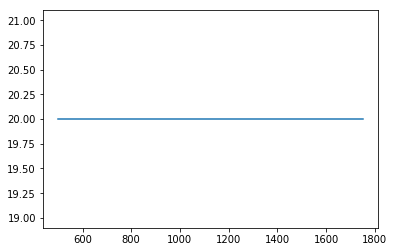

In [90]:
errors = []
for reservoir_size, reservoir in min_wise_reservoirs.items():
    error = calculate_distribution_error(reservoir, actual_distribution)
    errors.append(error)

print(errors)
plt.plot(min_wise_reservoir_sizes, errors)
plt.show()

In [ ]:
class MinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.structure = np.zeros((depth, width))
    
    def add(self, element):
        for current_depth in range(self.depth):
            index = hash((element, current_depth)) % self.width
            self.structure[current_depth][index] += 1
    
    def query_count(self, element):
        counts = []
        for current_depth in range(self.depth):
            index = hash((element, depth)) % self.width
            counts.append(self.structure[current_depth][index])
        return min(counts)

In [ ]:
widths = range(500, 2000, 250)
depths = range(1, 51, 10)

# Create sample distributions using different reservoir sizes
sketch_reservoirs = {}
for depth in depths:
    for width in widths:
        mws = MinSketch(depth, width)
        for dst_ip in scenario_data['dst_ip']:
            mws.add(dst_ip)
        sketch_reservoirs[(depth, width)] = mws       

In [ ]:
# Evaluate Sketch performance

# Get the counts from the sketches
sketch_reservoirs_counts = {}
for params, sketch in sketch_reservoirs.items():
    sketch_reservoirs_counts[params] = {}
    for a in actual_distribution:
        # Lookup ip from actual distributution in sketch
        sketch_reservoirs_counts[params][a[0]] = sketch.query_count(a[0])

sketch_reservoirs_counts 